### 印度食物支出与总支出的双变量回归分析

计量经济学基础第五版 P153
用总支出解释食物支出

In [2]:
import pandas as pd
import numpy as np 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df=pd.read_excel('data/印度食物支出与总支出.xls')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
FOODEXP     55 non-null int64
TOTALEXP    55 non-null int64
dtypes: int64(2)
memory usage: 960.0 bytes


In [5]:
df.head()

,FOODEXP,TOTALEXP
0,217,382
1,196,388
2,303,391
3,270,415
4,325,456


In [6]:
df.describe()

,FOODEXP,TOTALEXP
count,55.000000,55.000000
mean,373.345455,639.036364
std,83.435097,116.159527
min,196.000000,382.000000
25%,323.500000,582.000000
50%,362.000000,650.000000
75%,417.500000,732.000000
max,610.000000,801.000000


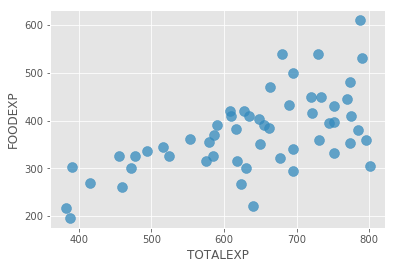

In [7]:
#ax=df.plot(kind='scatter',x='TOTALEXP',y='FOODEXP',c='TOTALEXP',cmap='hsv',s=100,alpha=0.75)
df.plot(kind='scatter',x='TOTALEXP',y='FOODEXP',s=100,alpha=0.75)

In [8]:
results = smf.ols('FOODEXP ~ 1 +TOTALEXP', data=df).fit()

In [9]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                FOODEXP   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     31.10
Date:                Mon, 26 Mar 2018   Prob (F-statistic):           8.45e-07
Time:                        14:22:21   Log-Likelihood:                -308.16
No. Observations:                  55   AIC:                             620.3
Df Residuals:                      53   BIC:                             624.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.2088     50.856      1.852      0.0

回归方程
FOODEXP=94.2088+0.4368*TOTALEXP

TOTALEXP表示家庭总支出，回归系数为0.4368，存在着预期的正相关，即家庭总支出越多，食物支出越多。
如果总支出增加1单位，食物支出平均增加0.4368个单位
t=5.577，相应的p=0.000，在零假设下，出现这种样本的概率为0，因此拒绝TOTALEXP的系数为0的原假设，
回归系数显著异于零，说明模型应该包含总支出变量。

R-squared，就是r方，为0.370，食物支出的变异中，有37%的可以由总支出来解释。

雅克-贝拉检验表明：JB统计量0.258，在正态性假定下，得到这样一个统计量的概率为88%。因此我们不拒绝残差项
是正态分布的假设。

In [10]:
print("Parameters:",results.params)
print('Standard errors: ', results.bse)
print("R2:",results.rsquared)

Parameters: Intercept    94.208777
TOTALEXP      0.436809
dtype: float64
Standard errors:  Intercept    50.856346
TOTALEXP      0.078323
dtype: float64
R2: 0.369823733627


In [11]:
#results.predict() 给出每个样本值的预测值
print('Predicted values: ', results.predict())

Predicted values:  [ 261.06972107  263.69057358  265.00099984  275.48440991  293.39356879
  295.1408038   300.38250884  303.00336135  309.9923014   319.60209397
  323.53337275  336.20082658  345.3738104   347.12104541  349.74189793
  350.17870668  351.92594169  359.78849925  360.66211675  363.28296927
  364.15658678  366.34063054  368.08786555  369.39829181  371.58233558
  373.76637934  377.26084937  378.13446687  380.31851064  383.37617191
  383.81298066  389.92830321  391.23872946  395.60681699  397.79086076
  397.79086076  397.79086076  408.71107959  409.14788834  413.07916712
  413.51597587  414.38959337  419.63129841  422.25215093  422.68895968
  422.68895968  430.11470848  431.8619435   431.8619435   432.735561
  437.10364853  438.41407479  439.2876923   441.47173606  444.09258858]


In [21]:
def getChineseFont():  
    return FontProperties(fname='/System/Library/Fonts/PingFang.ttc') 

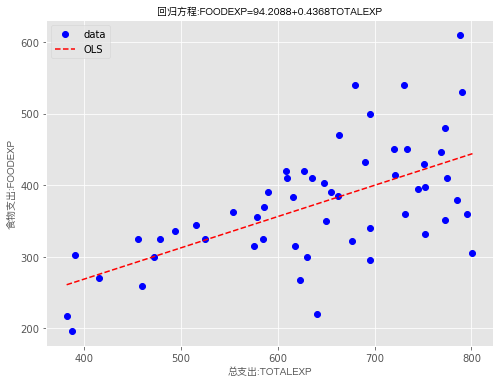

In [23]:
from matplotlib.font_manager import FontManager, FontProperties  
x=df.TOTALEXP.values
y=df.FOODEXP.values
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'bo', label="data") #蓝色圈圈
ax.plot(x, results.predict(), 'r--', label="OLS")
ax.legend(loc='best') #loc='best' 最佳位置
ax.set_title('回归方程:FOODEXP=94.2088+0.4368TOTALEXP',fontproperties=getChineseFont())
ax.set_ylabel('食物支出:FOODEXP',fontproperties=getChineseFont())
ax.set_xlabel('总支出:TOTALEXP',fontproperties=getChineseFont())
plt.show()